# LHCb Startertalk on Uncertainties

**by Hans Dembinski, TU Dortmund**

![image.png](https://imgs.xkcd.com/comics/error_bars.png)

## What is an uncertainty, really?

We write $a = 3 \pm 0.5$, where 0.5 is the *standard error* (jargon: "error" = uncertainty).

What does this truely mean?

a) The true value given by nature is 3, but when we measure it, it fluctuates (e.g. Heisenberg uncertainty principle).

b) I made an experiment and this expresses my belief that the value is most likely 3 and is located within the interval 2.5 to 3.5 with 68 % probability. This is based on the data that I recorded and my initial assumption that the value of $a$ is positive.

c) Someone made an experiment and their estimate for the true value of $a$ based on the data is 3. The interval (2.5, 3.5) contains the true value with 68 % probability.

* a) Is nonsense, but b) and c) are valid interpretations
* In HEP, we generally mean c), because we compute uncertainties based on the Frequentist school of statistics
* b) follows from the Bayesian school of statistics
* In b) or c), what does "68% probability" really mean in each context?

## Statistical and systematic uncertainties

* Either type can be correlated or uncorrelated


### Statistical uncertainty
* Origin: We use finite sample instead of infinite distribution
* Goes down as simple size increases
* Example
    * Arithmetic mean $\bar x = \frac 1N\sum_i x_i$
    * Variance of mean $ = \frac 1 {N(N - 1)}\sum_i (x_i - \bar x)^2$
* We have reliable standard recipes to calculate these

* Variance or standard deviation?
    * Standard deviation $\sigma = \sqrt{V}$
    * We communicate standard deviations, but compute variances
    * Variance is more fundamental
        * Second central moment of distribution
        * $V = V_1 + V_2$, but $\sigma = \sqrt{\sigma_1^2 + \sigma_2^2}$

### Systematic uncertainty
* Origin: Imperfect appartus or technique, deviations of reality from simplified models
* Quantifies potential mistakes in analysis or lack of knowledge
* Does not go down as sample size increases
* Correlated examples
    * Real-life: Measured the length of ten shoes with ruler than has factory tolerance of 0.1 mm
    * LHCb: Measured cross-sections with value of luminosity that has uncertainty of 1-2%
* Uncorrelated examples
    * Real-life: ???
    * LHCb: Measured momentum of particle in LHCb differs from true momentum $\sigma_p/p \approx 0.5\!-\!1\%$
* Conceptually different, requires different math
* Not well covered in statistics books, but some theoretical results available
* Many misconceptions

### Statistical errors can be systematic errors
* Depends on context
* Statistical error of parameter in control study is systematic error in main study
* Example: LHCb performs calibration measurements to determine tracking and PID efficiencies
    * Statistical errors in calibration measurements are systematic errors in main measurement

## Statistical uncertainties: Basic concepts

We need to distinguish between *true value*, *estimator*, and *estimate (or estimated value)*.

* Sample $\{ x_i \}$ drawn from distribution $F(x)$ consists of random values $x_i$ that are independent and identically distributed (iid)
* Sample values occur with probability
    * $P(k) = F(k)$ if $k$ discrete
    * $d P(x) = d F(x) = f(x) dx$ if $x$ continuous
* $f(x)$ probability density function (pdf)
* $F(x)$ cumulative density function (cdf)
* Will refer to $f(x)$ and $F(x)$ as the distribution
* Beware lax jargon: distribution != sample

In [63]:
# Example: standard normal distribution ("Gaussian")
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
x = np.linspace(-5, 5, 1000)
fx = norm.pdf(x)
Fx = norm.cdf(x)
sample = norm.rvs(size=50, random_state=1)

In [64]:
def plot():
    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
    for axi, y, label in zip(ax, (fx, Fx), ("f(x), pdf", "F(x), cdf")):
        axi.plot(x, y, label=label)
        axi.set_xlabel("x")
    ax[0].plot(sample, np.zeros_like(sample), "|", label="sample")
    for axi in ax: axi.legend()

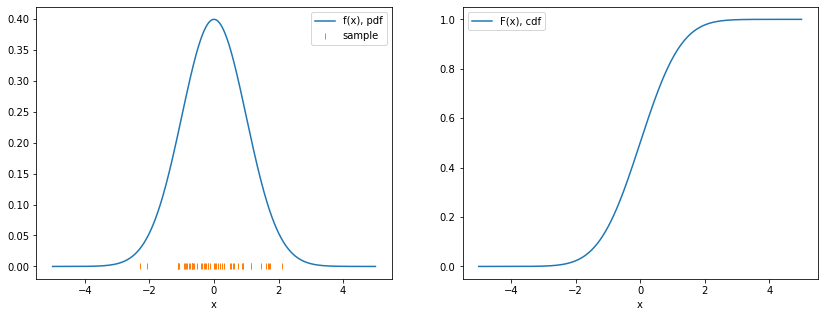

In [65]:
plot()

* Distribution usually depends on parameters that we are interested in
    * Example: Normal distribution depends on parameters $\mu, \sigma$ (location, width)
* Notation: $f(x; a, b, \dots)$, semicolon separates random variable $x$ from parameters $a, b, \dots$
* In general, $x$ can be a vector and parameters can be written as vector, too:  $f(\vec x; \vec a)$


### Estimation
* Estimation is statistician speak for "measurement"
* We have sample $\{ x_i \}$ which is distributed according to $f(x; a)$, $a$ is unknown
* Estimator $h[x]$ maps data sample to estimate $\hat a$ of $a$
* Notation
    * $h[x]$ estimator maps sample $\{ x_i \}$ to value
    * $f(x)$ is function that maps value to value 
* Examples of estimators of location of distribution
    * Arithmetic mean $h_1[x] = \frac 1N \sum_i x_i$
    * Sample median $h_2[x]$: Sort $x_i$, pick value in the middle
* Estimator can be formula in closed form or an algorithm (recipe)

In [67]:
# Example: normal distribution with true value mu=1, sigma=0.5
# mu is of interest; sigma is not of interest, a nuisance parameter

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

mu, sigma = 1, 0.5
dist = norm(mu, sigma)
x = np.linspace(-1, 3, 1000)
sample = dist.rvs(size=20, random_state=1)

est1 = np.mean(sample)
est2 = np.median(sample)

In [68]:
def plot():
    plt.plot(x, dist.pdf(x))
    plt.xlabel("x")
    plt.plot(sample, np.zeros_like(sample), "|")
    plt.axvline(dist.stats()[0], label="$\mu$", color="C3")
    plt.axvline(est1, ls="--", label="mean", color="C2")
    plt.axvline(est2, ls=":", label="median", color="C4")
    plt.legend();

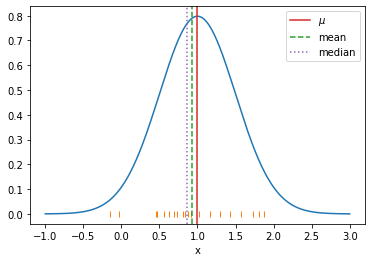

In [69]:
plot()

### Optimal estimators

* Many kinds of estimators, some better than others
* We want **optimal** estimators
* Some desirable properties
    * As close to true value as possible (we come back to that)
    * Easy to compute and/or easy to apply to any problem
    * Robustness against outliers
* In HEP, we mainly use
    * Maximum-likelihood estimator (MLE)
    * Plug-in estimator
    * Bootstrap estimator (meta estimator)

###  How far away is estimate from true value?

* Depends on estimator, sample size, distribution
* Almost magic: accuracy of estimator can be also estimated from sample!
* Define "close to true value"
    * In experiment, we have sample $\{ x_i \}$ with size $N$ and obtained estimate $\hat a = h[x]$
    * Sample $\{ x_i \}$ is random and so is estimate $\hat a$
    * If experiment is identically repeated $K$ times, we get sample $\{ x_i \}_k$ and estimate $\hat a_k$ each time
    * Quantify properties of sample of estimates $\{ \hat a_1, \hat a_2, \dots, \hat a_K \}$ to describe accuracy of estimator with bias and variance estimates
        * Bias: $\hat B[\hat a] = \frac1K \sum_i (\hat a_i - a)$
        * Variance: $\hat V[\hat a] = \frac1K\sum_i (\hat a_i - a)^2$
* Example for a biased estimator: if true mean $\mu$ is unknown, variance estimate $\hat V[x] = \frac1N\sum_i (x_i - \hat\mu)^2$ is biased

In [70]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

# true values and distribution
mu, sigma = 1, 1
dist = norm(mu, sigma)

N, K = 10, 1000
var_1, var_2 = [], []
for k in range(K):
    sample = dist.rvs(size=N, random_state=k+1)
    hat_mu = np.mean(sample)
    v1 = np.mean((sample - np.mean(sample)) ** 2)
    v2 = np.mean((sample - mu) ** 2)
    var_1.append(v1)
    var_2.append(v2)

In [75]:
# hidden plotting code used in next cell
def plot():
    mu, sigma = dist.stats()
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5))
    ax[0].hist(var_1, bins=50, label="$\hat V[x; \hat \mu]$");
    ax[1].hist(var_2, bins=50, label="$\hat V[x; \mu]$");
    for axi in ax:
        axi.axvline(sigma ** 2, color="C3", label="true V[x]")
    ax[0].axvline(np.mean(var_1), color="C1", ls="--", label="mean of $\hat V[x; \hat \mu]$")
    ax[1].axvline(np.mean(var_2), color="C1", ls="--", label="mean of $\hat V[x; \mu]$")
    for axi in ax:
        axi.legend()

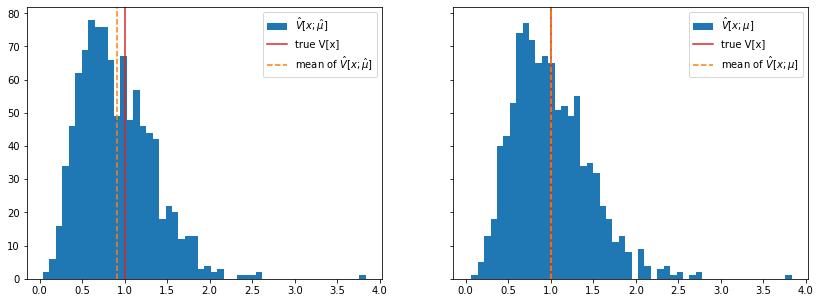

In [76]:
plot()

* Perhaps surprising that $\hat V[x; \hat \mu]$ is biased although $\hat \mu$ is an unbiased estimate of $\mu$
* In this case, simple well-known bias correction: $\frac N{N-1}\hat V[x; \hat \mu]$ is unbiased (for derivation see e.g. F. James book (references at end))

In [77]:
# Example for variance of estimator: variance of mean and median
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, t

mu, sigma = 0, 1

dist = {
    "norm": norm(mu, sigma),
    "t": t(2, mu, sigma),
} 

N, K = 10, 1000
data = {}
for dkey, d in dist.items():
    est = {"mean": [], "median": []}
    all_samples = []
    for k in range(K):
        sample = d.rvs(size=N, random_state=k+1)
        est["mean"].append(np.mean(sample))
        est["median"].append(np.median(sample))
        all_samples.append(sample)
    data[dkey] = est, all_samples

In [84]:
def plot():
    for dkey, (est, all_samples) in data.items():
        fig, ax = plt.subplots(1, 3, figsize=(14, 4))
        ax[0].hist(np.concatenate(all_samples), bins=50, range=(-10, 10))
        ax[0].set_title(dkey)
        ax[0].set_xlabel("x")
        for axi, (key, esti) in zip(ax[1:], est.items()):
            axi.hist(esti, bins=50)
            axi.set_title(f"$\\langle \mathrm{{{key}}} "
                          f"\\rangle = {np.mean(esti):.3f}$ "
                          f"$\hat V[\mathrm{{{key}}}] = {np.var(esti):.3f}$""")
            axi.set_xlabel(f"{key}")

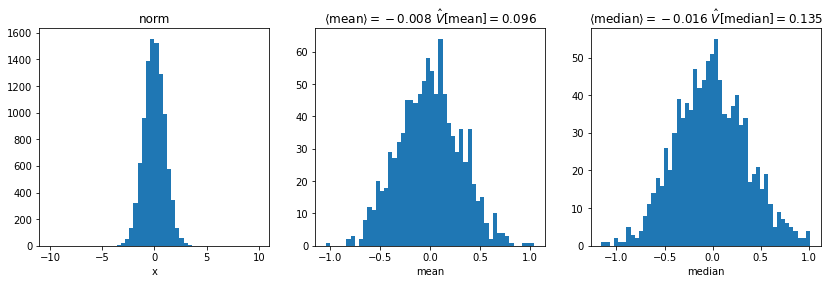

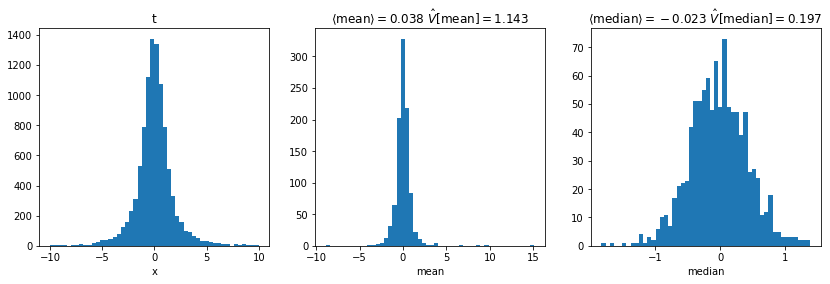

In [85]:
plot()

* For normal distribution
    * Median has larger variance than arithmetic mean
* For Student's t distribution
    * Median has smaller variance than arithmetic mean
* Which estimator is least biased and has smallest variance depends on distribution
* Good estimator for any distribution: maximum-likelihood estimator

### Plug-in estimator

* Plug-in principle: replace true values in some formula with estimates, e.g.

$$
c = g(a, b, \dots) \to \hat c = g(\hat a, \hat b, \dots)
$$

* Justification (1D, likewise for ND)
    * For $N\to \infty$, $\Delta a = \hat a - a \to 0$ for any reasonable estimator
    * $g(\hat a) = g(a + \Delta a) = g(a) + O(\Delta a) \to g(a)$ for smooth $g$

* Example: $\sqrt{N}$ uncertainty estimator for Poisson-distributed count $N$
    * Variance of Poisson distribution of counts $N$: $V_N = \lambda$
    * Plug-in principle: Replace expected count $\lambda$ with observed count $N$: $\hat V_N = N$
    * Standard deviation is square-root of variance: $\hat \sigma_N = \sqrt{\hat V_N} = \sqrt{N}$

* Plug-in estimators are usually biased (**unless g is linear**) and may fail to give reasonable answers for very small samples
    * Extreme case: $\lambda = 0.01$, sample $N = 0 \to \sqrt{0} = 0 \neq 0.1$
* **Be aware** of potentially bias when you use plug-in estimator

### Bootstrapping estimator bias and variance

* Bootstrap method is generic way to compute bias and variance of any estimator
* Looks like a magic trick, but well-founded in theory (excellent introductory book by inventor Brad Efron at the end)

#### Parametric bootstrap

* LHCb jargon: "running toy simulations"
* Situation:
    * You have sample $\{ x_i \}$ distributed along $f(x; a)$ with unknown parameter $a$
    * You have estimator $\hat a = h[x]$ (can be a formula, fit, anything)
    * You want to estimate bias and variance of $h[x]$
* If we knew true $a$, could simply simulate the experiment many times
    * Generate sample $\{ x_i \}_k$ from $f(x; a)$ with same size as $\{ x_i \}$, compute $\hat a_k$
    * Compute bias and variance estimates from sample $\{ \hat a_k \}$ as shown before
* Don't know $f(x; a)$, but its plug-in estimate $\hat f(x) = f(x; \hat a)$!
* So do the same but sample from $\hat f(x)$
* This actually works, and very well!

In [90]:
# parametric bootstrap to estimate variance of mean
import numpy as np
from scipy.stats import norm

mu, sigma = 1, 1
N = 10
sample = norm(mu, sigma).rvs(N, random_state=1)

# in general, we use a fit here to get parameters of distribution
mu_est = np.mean(sample)
sigma_est = np.std(sample, ddof=1)
dist = norm(mu_est, sigma_est)

mu_est_b = []
for k in range(1000):
    b = dist.rvs(N, random_state=k)
    mu_est_b.append(np.mean(b))
    
print(f"Bias = {np.mean(mu_est_b) - mu_est:.2f} "
      f"std.dev. = {np.std(mu_est_b, ddof=1):.2f} "
      f"(expected: {sigma / N ** 0.5:.2f})")

Bias = -0.01 std.dev. = 0.39 (expected: 0.32)


#### Non-parametric bootstrap

* Taking previous idea one step further
* Sampling does not require $\hat f(x)$, but $\hat F(x)$ (the cdf)
* $\hat F(x)$ can be estimated directly from sample $\{ x_i \}$ (empirical cdf)
* Accuracy a bit worse than parametric bootstrap, but even easier to use

In [91]:
# bootstrap bias and variance of arithmetic mean
import numpy as np
from resample.bootstrap import resample
from scipy.stats import norm

mu, sigma = 1, 1
N = 10
sample = norm(mu, sigma).rvs(N, random_state=1)

mu_est_b = []
for replicas in resample(sample, size=1000):
    mu_est_b.append(np.mean(replicas))
    
print(f"Bias = {np.mean(mu_est_b) - mu_est:.2f} "
      f"std.dev. = {np.std(mu_est_b, ddof=1):.2f} "
      f"(expected: {sigma / N ** 0.5:.2f})")

Bias = 0.00 std.dev. = 0.38 (expected: 0.32)


In [93]:
# Bonus: bootstrap bias and variance of np.var
import numpy as np
from resample.bootstrap import bias, variance
from scipy.stats import norm

mu, sigma = 1, 1
N = 10
sample = norm(mu, sigma).rvs(N, random_state=1)

for ddof in (0, 1):
    def fn(s):
        return np.var(s, ddof=ddof)
    
    print(f"Bias = {bias(fn, sample, random_state=1):.2f} "
          f"std.dev. = {np.sqrt(variance(fn, sample, random_state=1)):.2f}")

Bias = -0.13 std.dev. = 0.53
Bias = 0.01 std.dev. = 0.59


* Use `np.var(s, ddof=1)` if you want unbiased estimate

### Standard intervals, coverage and coverage probability

* Standard interval for parameter $a$: $\hat a \pm \sqrt{\hat V[\hat a]}$
* Not a statement about true value of $a$, just a quantification of the properties of the estimate!
* But what does it mean then?

* Quadrature of circle: How to make a statement about the true value without using the true value? 
* Frequentist school of statistics: construct intervals such that true value is covered by interval in fraction $P_\text{cov}$ of identically repeated experiments
* Formal way to do this: [Neyman construction](https://en.wikipedia.org/wiki/Neyman_construction)
    * Works perfectly for continuous distributions, but not for discrete (Poisson, Binomial, ...)
    * Rarely used in practice, too cumbersome

* Coverage important and useful property of intervals
* Jargon: "This interval has (proper) coverage"
    * Meaning: actual coverage probability in identically repeated experiments is equal to expected $P_\text{cov}$
* For $N \to \infty$, $\hat a \pm \sqrt{\hat V[\hat a]}$ interval has coverage probability of 68%
    * And if well-constructed, also for finite $N$
* **Standard errors should form interval with 68 % coverage probability**
    * If coverage is too small/large, adjust interval estimator
* Example: Coverage of the commonly used Poisson interval $N \pm \sqrt{N}$?

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

N = [0.5, 10., 45.]
K = 100000

data = []
for Ni in N:
    n = poisson(Ni).rvs(size=K, random_state=int(Ni))
    sigma_est = np.sqrt(n)
    inside = np.abs(Ni - n) < sigma_est
    cov_prob = np.mean(inside)
    data.append((Ni, n, sigma_est, inside, cov_prob))

In [104]:
def plot():
    fig, ax = plt.subplots(1, len(N), sharex=True, figsize=(14, 4))
    for (Ni, n, sigma_est, inside, cov_prob), axi in zip(data, ax):
        axi.axhline(Ni, color="0.5", zorder=0)
        i = np.arange(50)
        n = n[:50]
        sigma_est = sigma_est[:50]
        inside = inside[:50]
        for m, c in zip((~inside, inside), ("C0", "C1")):
            axi.errorbar(i[m], n[m], sigma_est[m], fmt="o", color=c)
        axi.set_title(f"P_cov = {cov_prob:.2f}")
    fig.supxlabel("repeated experiments");

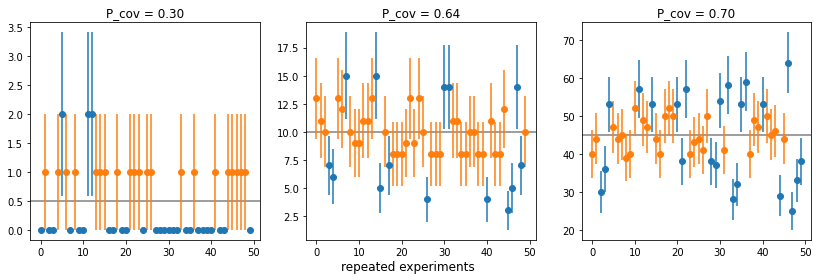

In [105]:
plot()

* Poisson interval $N \pm \sqrt{N}$ only has proper coverage for $N \gtrsim 45$
    * Reason: if $N$ fluctuates downwards, interval shrinks
* Intervals can be empty in some experiments; this is not ideal, but not a defect
* If you have an estimate $\mu$ for the true value of $N_i$, this is better: $N_i \pm \sqrt{\mu}$

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

N = [0.5, 10, 20]
K = 100000

data = []
for Ni in N:
    n = poisson(Ni).rvs(size=K, random_state=int(Ni))
    mu = np.mean(n)
    sigma_est = np.sqrt(mu)
    inside = np.abs(Ni - n) < sigma_est
    cov_prob = np.mean(inside)
    data.append((Ni, n, sigma_est * np.ones(len(n)), inside, cov_prob))

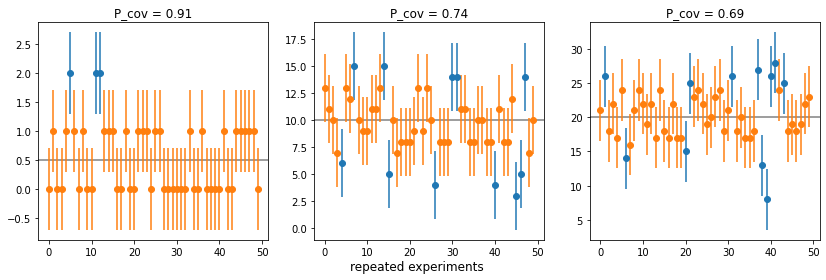

In [111]:
plot()

### Maximum-likelihood estimator (MLE)

* MLE has attractive properties
    * For $N \to \infty$, as close to true value as possible (proven)
        * Unbiased and minimum variance
    * In finite samples
        * Biased in general, but bias zero or small for many important distributions
        * Probably as close to true value as possible (conjecture)
    * Easy to compute MLE **and its variance estimate** (with suitable software)
    * But: Not robust against outliers or model misspecification

* Maximum-likelihood estimator for parameter $a$
$$
\begin{aligned}
h_\text{MLE}[x] &= \text{argmax}_{a}\, \ln \mathcal L(a) \\
\ln \mathcal L(a) &:= \ln \prod_i P(x_i; a) = \sum_i \ln f(x_i; a) + \text{const}
\end{aligned}
$$

* MLE example: arithmetic mean is MLE for parameter $\mu$ of normal distribution
$$
\begin{aligned}
\frac\partial{\partial \mu} \sum_i \ln\left( \frac1{\sqrt{2\pi} \sigma} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2} \right)\right) &\overset{!}{=} 0 \\
\underbrace{\frac\partial{\partial \mu} \sum_i \ln\left( \frac1{\sqrt{2\pi} \sigma} \right)}_{0} - \frac\partial{\partial \mu} \sum_i \frac{(x_i - \mu)^2}{2\sigma^2} &= 0\\
\sum_i \frac{x_i - \mu}{\sigma^2} &= 0 \\
\sum_i x_i - \sum_i\mu &= 0 \\
\Rightarrow \hat\mu = \frac 1 N \sum_i x_i &
\end{aligned}
$$
* In general: Use numerical optimiser (e.g. MINUIT) to find MLE for any distribution

### Uncertainty of maximum likelihood estimate

* Two ways to compute uncertainty estimates for MLE based on theorems by Fisher and [Wilks](https://en.wikipedia.org/wiki/Wilks'_theorem)
* Recommended: lecture on MLE by Geyer (2013) https://www.stat.umn.edu/geyer/5601/notes/sand.pdf

#### Variance estimate

* Variance estimate for MLE estimator $\hat a$ of parameter $a$
$$
\hat V[\hat a] = -\left(\frac{\partial^2 \ln \mathcal L(a)}{\partial a^2}\Bigg|_{a=\hat a}\right)^{-1}
$$
* Covariance estimate for multivariate MLE of parameter $\vec a$
$$
\hat C_{ik}[\hat{\vec a}] = -\left(\frac{\partial^2 \ln \mathcal L(\vec a)}{\partial a_i \partial a_k}\Bigg|_{\vec a=\hat {\vec a}}\right)^{-1}
$$
* MINUIT computes this numerically (HESSE method)

* Example: variance estimate for $\hat\mu$ for normally distributed data with known width $\sigma$
$$
-\left(\frac{\partial^2 \ln \mathcal L(\mu)}{\partial \mu^2}\right)^{-1} = \dots = \left(\frac{\partial^2}{\partial \mu^2} \sum_i \frac{(x_i - \mu)^2}{2\sigma^2}\right)^{-1}
$$
$$ = -\left(\frac{\partial}{\partial \mu} \sum_i \frac{(x_i - \mu)}{\sigma^2}\right)^{-1} = \left(\sum_i \frac1{\sigma^2}\right)^{-1} = \frac{\sigma^2}{N}
$$
* Well-known result for error on the mean

#### Profile likelihood scan

* Produces asymmetric uncertainty intervals in general
* For desired confidence level $CL$ (a probability) solve $\chi^2(\lambda;M) = CL$ for $\lambda$, where $M$ is number of parameters of interest (subset of all parameters)
* Solve for contour in $\vec a$-space (parameters of interest) 
$$
- 2\ln \frac{\mathcal{L}(\vec a, \hat b(\vec a))}{\mathcal{L}(\hat {\vec a}, \hat{\vec b})} = \lambda
$$
where $\hat b(\vec a)$ are maximum-likelihood estimates of nuisance parameters $\vec b$ for fixed values of $\vec a$

* Too complicated? No problem, MINUIT computes all this numerically for you (MINOS method)
* Commonly used to draw uncertainty contours
* Sometimes advertised as superior to variance estimate (HESSE method), but isn't
    * [Does not produce intervals with better coverage in general](https://iminuit.readthedocs.io/en/stable/tutorial/hesse_and_minos.html)
    * Cannot combine asymmetric intervals/confidence regions from different experiments, see Roger's lecture (references at the end)
* If you really need this, publish full likelihood function with tools like [pyhf](https://github.com/scikit-hep/pyhf) or [HistFactory](https://root.cern.ch/doc/master/group__HistFactory.html)

In [15]:
# Example: fit parameters of shifted Student's t distribution
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.stats import t

nd = 3
mu = 1.0
sample = t(nd, mu).rvs(size=50, random_state=1)

In [16]:
def model(x, nd, mu):
    return t(nd, mu).pdf(x)

cost = UnbinnedNLL(sample, model)

m = Minuit(cost, nd=2, mu=0)
m.limits["nd"] = (1, None)
m.migrad()  # also runs equivalent of m.hesse() by default
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 165                        │              Nfcn = 131              │
│ EDM = 2.85e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ nd   │    3.6    │    1.5    │    -1.2    │    2.1     │    1    │         │       │
│ 1 │ mu   │   0.97    │   0.16    │   -0.16    │    0.16    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          nd           │          mu           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -1.2    │    2.1    │   -0.16   │   0.16    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      nd      mu │
├────┼─────────────────┤
│ nd │    2.36 0.00743 │
│ mu │ 0.00743  0.0264 │
└────┴─────────────────┘

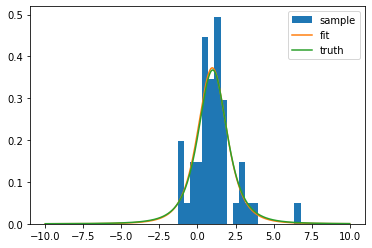

In [17]:
xm = np.linspace(-10, 10, 1000)
plt.hist(sample, bins=20, density=True, label="sample")
plt.plot(xm, t(*m.values).pdf(xm), label="fit")
plt.plot(xm, t(nd, mu).pdf(xm), label="truth")
plt.legend();

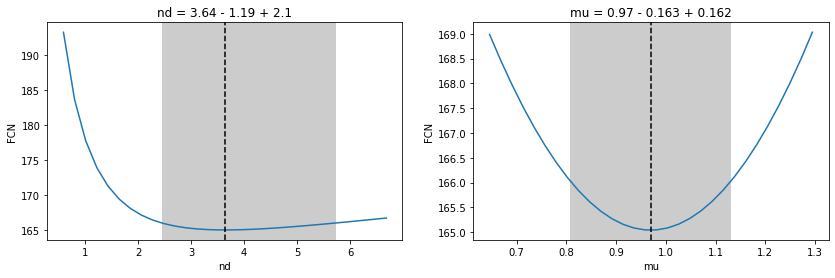

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
for axi, par in zip(ax, ("nd", "mu")):
    plt.sca(axi)
    m.draw_mnprofile(par)

### Misspecified models

* Maximum-likelihood method assumes that model is correctly specified, all proven properties rely on that
* Examples of misspecified models
    * Assumed: signal only, actually: signal + background
    * Assumed: normal distribution, actually: distorted normal (wider tails, asymmetric, etc)

* If model is misspecified
    * MLE is biased in general, but may not be
    * MLE uncertainties (from either method) no longer have coverage
* Fundamentalist: models are essentially always misspecified, since they are always approximations
* Pragmatist: Small deviations have negligible effect
* Worse at HL-LHC: higher statistics, so more sensitive to small deviations

  * Need goodness-of-fit criterion (not discussed here) to check whether model is reliable
* How to fix this: make model more general (by adding parameters) so it is no longer misspecified
    * Use Student's t (or double-sided Crystal Ball) instead of normal distribution to fit peak
    * Use polynomial of higher order for smooth background
    * ...

## Systematic uncertainties: Known unknowns

 [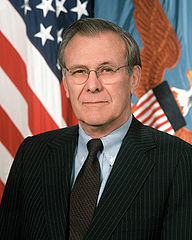](https://commons.wikimedia.org/w/index.php?curid=768473)
* Donald Rumsfeld: "There are known knowns, things we know that we know; and there are known unknowns, things that we know we don't know. But there are also unknown unknowns, things we do not know we don't know."

* Why data analyses take so long: Study data, detector, and methods to turn **unknown unknowns** into **known knowns** or **known unknowns**

* No formal way, but generally...
  * Apply **checks**
      * Split data by magnet polarity, fill, etc., analyse splits separately, check for agreement
  * Worry
      * What could go wrong?
      * What are my assumptions?
      * Example: You take an efficiency or correction factor from simulation, but simulation differs from real experiment; perform control measurement or use standard LHCb control measurements
  * Methods
      * If feasible, start from first principles or use methods that are known to be optimal/robust
      * Examples
          * Use Maximum-likelihood instead of least-squares fit
          * Use bootstrap estimate of error

* Guidelines for handling systematic errors
   * [Roger Barlow: Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
   * [Roger Barlow, "Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)


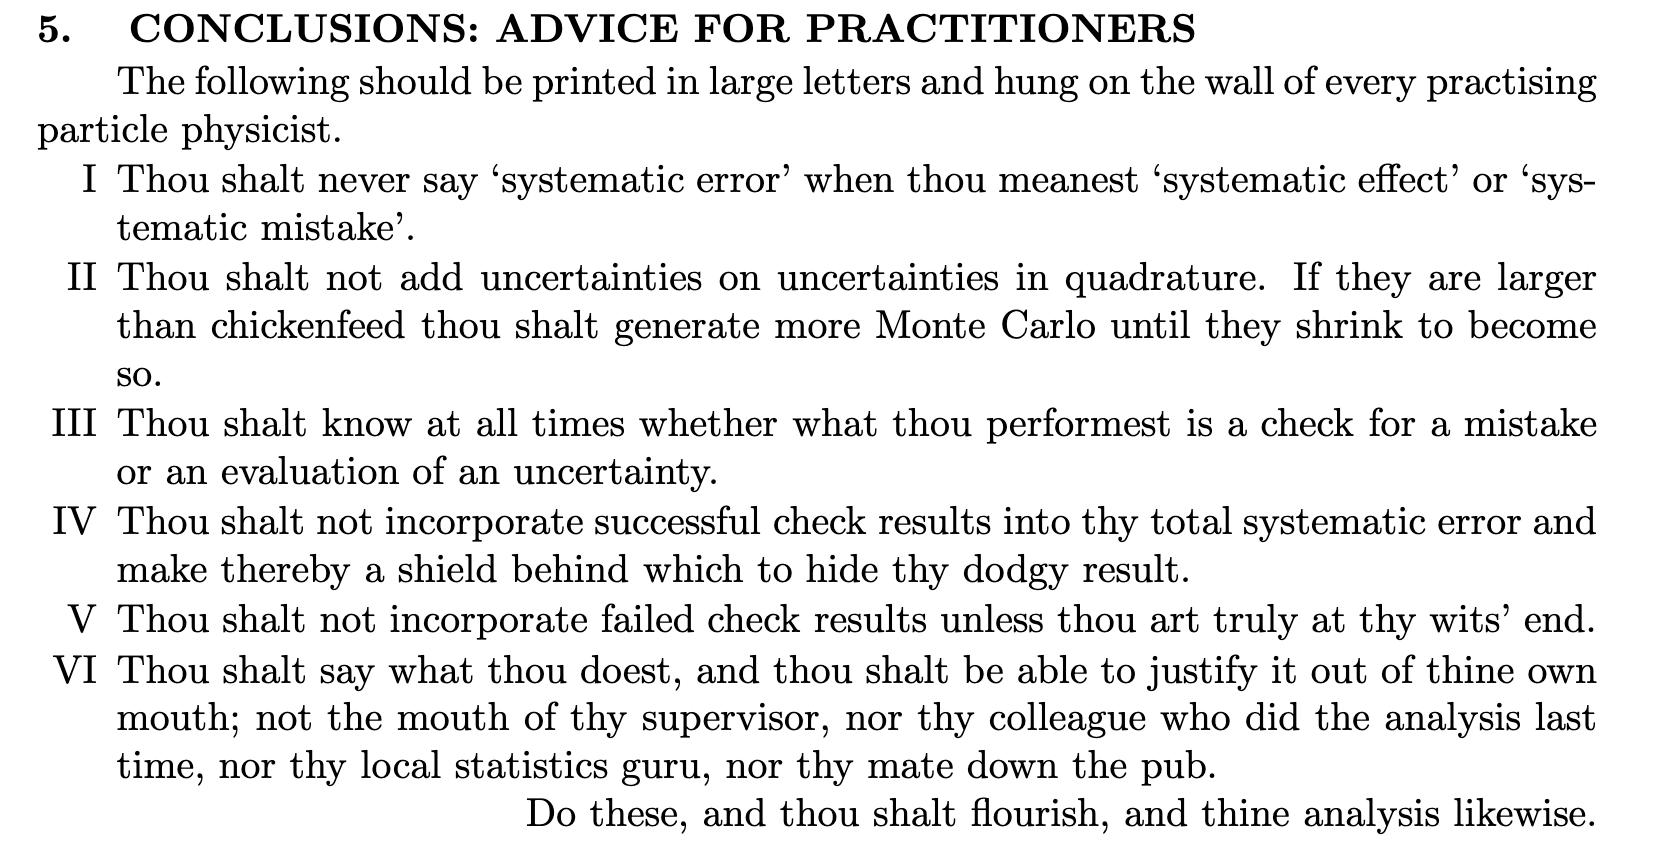

## Error propagation

* You have vector of values $\vec a$ with covariance matrix $C_a$ and a smooth function $\vec b = f(\vec a)$, you want to know $C_b$
* $\vec b$ can have different dimensionality from $\vec a$

### Option 1: Standard error propagation 

* Based on first order Taylor expansion
$$
C_b = J \, C_a \, J^T
$$
with Jacobi matrix $J$
$$
J_{ik} = \frac{\partial f_i}{\partial a_k}
$$
* For derivation, see F. James book (references at end)
* Can be used for statistical and systematic uncertainties!

* Useful special cases
    * Sum of scaled independent random values $c = \alpha a + \beta b$ ($\alpha, \beta$ are constant)
    $$
    \sigma^2_c = \alpha^2 \sigma^2_a + \beta^2 \sigma^2_b
    $$
    * Product of powers of independent random values $c = a^\alpha \, b^\beta$
    $$
    \left(\frac{\sigma_c}{c}\right)^2 = \alpha^2 \left(\frac{\sigma_a}{a}\right)^2 + \beta^2 \left(\frac{\sigma_b}{b}\right)^2
    $$
    * Dominated by component with largest (relative) uncertainty
    * Put your effort in estimating largest component and be more lax on small components

* Example
    * Arithmetic mean
    $$
    \hat \mu = \frac 1N\sum_i x_i
    $$

    * Variance of x (unbiased formula for unkown mean)
    $$
    \hat V[x] = \frac 1{N-1} \sum_i (x_i - \hat\mu)^2
    $$

    * Variance of the mean
    $$
    \hat{V}[\hat \mu] = \frac1{N^2} \sum_i \hat{V}[x_i] = \frac 1 {N(N - 1)}\sum_i (x_i - \hat \mu)^2
    $$
* Error-prone to do by hand, use software to compute numerical derivative

### Option 2: Monte-Carlo propagation

* To apply, you need to know distribution of $\vec a$

* Randomly sample $K$ times
* Compute sample $\{\vec b_k \} = \{ f(\vec a_k) \}$
* Compute sample covariance of $\{\vec b_k \}$

In [19]:
import numpy as np
from jacobi import propagate  # uses Option 1
from scipy.stats import multivariate_normal

a0, sigma_a0 = 2, 0.2
a1, sigma_a1 = 3, 0.5

a = [a0, a1]
cov_a = np.zeros((2, 2))
cov_a[0, 0] = sigma_a0 ** 2
cov_a[1, 1] = sigma_a1 ** 2

# option 1
b, cov_b = propagate(np.mean, a, cov_a)
print(f"option 1: b = {b:.2f} +/- {np.sqrt(cov_b):.2f}")

# option 2
a_sample = multivariate_normal(a, cov_a).rvs(size=10000)
b_sample = np.mean(a_sample, axis=1) # sum over second axis
cov_b = np.cov(b_sample, ddof=1)
print(f"option 2: b = {b:.2f} +/- {np.sqrt(cov_b):.2f}")

option 1: b = 2.50 +/- 0.27
option 2: b = 2.50 +/- 0.27


* Results identical here because function was linear;  they differ in general
* Which is better? Hard to say, depends on particular case
    * Option 2 is conceptually better, but you may need very large samples (>10000) to beat option 1 in accuracy

## LHCb Statistics Guidelines

* [Living document on GitLab](https://gitlab.cern.ch/lhcb/statistics-guidelines/-/blob/master/main.md) to collect information about best practices
    * Everyone can edit this and propose new items!
    * LHCb StatML conveners are editors, liaisons check new content

* Index instead of a book
    * Brief items with advice
    * Links to literature

* In conversation, you can directly link to items, point to title and copy link (right-click menu)

## Introductory statistics books

* [List of books on TWiki pages of Statistis and Machine Learning WG](https://twiki.cern.ch/twiki/bin/viewauth/LHCbPhysics/LHCbStatistics)

* Books I personally learned from
    * Glen Cowan, "Statistical Data Analysis", Oxford University Press, 1998
    * F. James, "Statistical Methods in Experimental Physics", 2nd edition, World Scientific, 2006
    * B. Efron, R.J. Tibshirani, "An Introduction to the Bootstrap", CRC Press, 1994

* Roger Barlow
    * [Introductory lecture (2019)](http://barlow.web.cern.ch/barlow/talks/2019/10.pdf)
    * [Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
    * ["Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)

* More Jupyter notebooks
    * [Matt Kenzie, PDG averaging](https://github.com/matthewkenzie/notebooks/blob/master/pdg_averaging.ipynb)
    * [Matt Kenzie, MLE uncertainties](https://github.com/matthewkenzie/notebooks/blob/master/LikelihoodProb.ipynb)
    * [iminuit tutorials on various fitting topics](https://iminuit.readthedocs.io/en/stable/tutorials.html)

* Free books
    * ["Introduction to Statistics and Data Analysis for Physicists", Gerhard Bohm and Günter Zech, Verlag-DESY, 2010](http://www-library.desy.de/preparch/books/vstatmp_engl.pdf)
    * ["Statistische und numerische Methoden der Datenanalyse", V Blobel and E Lohrmann, Open Access ebook CC-BY 3.0, 2012](https://link.springer.com/content/pdf/10.1007%2F978-3-663-05690-4.pdf)

### The END